Ploting Optimization - context modifiers
========================================

This is a very small example of a way to plot the built-in [context modifiers](../../usersguide/optimization.rst#context-modifier)

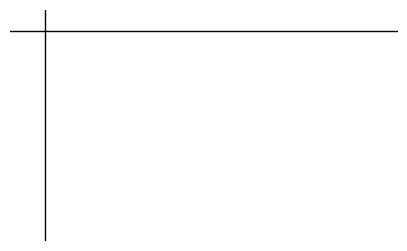

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import nrv 

fname = "figures/stimuli_v2"
small_linewidth = 1
big_linewidth = 5
markersize = 15


dt = 0.005
t_sim = 0.5
t_end = 0.5
I_max_abs = 100
t_bound = (0, t_end)
I_bound = (-I_max_abs, 0)

###################################################################
####################### waveform figure ###################
##################################################################
# Biphasic pulse
t_start = 0.1
context_modifier1 = nrv.biphasic_stimulus_CM(start=t_start, s_cathod="0", t_cathod="1", s_anod=0)
def generate_waveform0(Xsp2, t_sim=100, **kwargs):
    stim = context_modifier1.stimulus_generator(Xsp2)
    stim0 = nrv.stimulus()
    stim0.s = np.zeros(1000)
    stim0.t = np.linspace(0, t_sim, 1000)
    stim0 += stim
    return stim0.s

Xb = [85, 0.25]

waveform0 = generate_waveform0(Xb, t_sim=t_sim)
t0 = np.linspace(0, t_sim, len(waveform0))
# Spline 2pts
kwrgs_interp = {
    "dt": dt,
    "amp_start": 0,
    "amp_stop": 0,
    "intertype": "Spline",
    "bounds": I_bound,
    "fixed_order": False,
    "t_end": t_end,
    "t_sim":t_sim,
    "t_shift":0,
    "strict_bounds":True,
    }


Xsp1 = [0.1, 0]
Xsp1 += [0.27, -20]
Xsp1 += [0.35,0]

waveform1 = nrv.interpolate_Npts(Xsp1,**kwrgs_interp)
t1 = np.linspace(0, t_sim, len(waveform1))

Xsp2 = [0.1, 0]
Xsp2 += [0.22, -70]
Xsp2 += [0.15, -30]
Xsp2 += [0.35,0]

waveform2 = nrv.interpolate_Npts(Xsp2,**kwrgs_interp)
t2 = np.linspace(0, t_sim, len(waveform2))


fig, ax = plt.subplots(figsize=(5,3))
#plt.gcf()

#axes
ax.set_axis_off()
t_bound_plot = [-0.05, t_sim]
I_bound_plot = [-I_max_abs, 10]

ax.set_xlim(t_bound_plot)
ax.set_ylim(I_bound_plot)
ax.set_xticks([])
ax.set_yticks([])
ax.plot(t_bound_plot, [0, 0], linewidth=small_linewidth,color="k")
ax.plot([0, 0], I_bound_plot, linewidth=small_linewidth,color="k")


## waveform 2

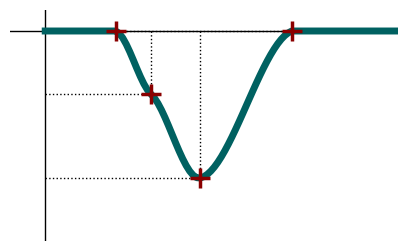

In [2]:
# details wf2
for i in range(len(Xsp2)//2):
    ax.plot([Xsp2[2*i], Xsp2[2*i]], [0, Xsp2[2*i+1]], ":", linewidth=small_linewidth,color="k")
    ax.plot([0, Xsp2[2*i]], [Xsp2[2*i+1], Xsp2[2*i+1]], ":", linewidth=small_linewidth,color="k")


# wf2
ax.plot(t2, waveform2, linewidth=big_linewidth,color="#006161")
ax.plot(Xsp2[::2], Xsp2[1::2], "+", markersize=markersize, markeredgewidth=big_linewidth/2,color="darkred")
fig

## waveform 1

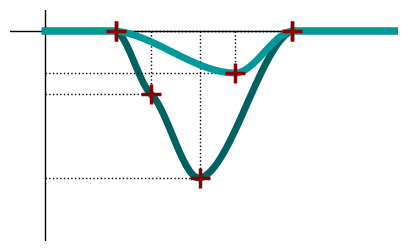

In [3]:
# details wf1
for i in range(len(Xsp1)//2):
    ax.plot([Xsp1[2*i], Xsp1[2*i]], [0, Xsp1[2*i+1]], ":", linewidth=small_linewidth,color="k")
    ax.plot([0, Xsp1[2*i]], [Xsp1[2*i+1], Xsp1[2*i+1]], ":", linewidth=small_linewidth,color="k")


# wf2
ax.plot(t1, waveform1, linewidth=big_linewidth,color="#009999")
ax.plot(Xsp1[::2], Xsp1[1::2], "+", markersize=markersize, markeredgewidth=big_linewidth/2,color="darkred")
fig

## waveform 0

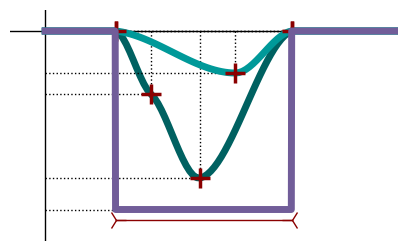

In [4]:
# details wf0
offset = 5
ax.plot([t_start, t_start+Xb[1]], [-Xb[0]-offset, -Xb[0]-offset], linewidth=small_linewidth,color="darkred")
ax.plot([t_start], [-Xb[0]-offset], "4", markersize=markersize,markeredgewidth=small_linewidth, color="darkred")
ax.plot([t_start+Xb[1]], [-Xb[0]-offset], "3", markersize=markersize,markeredgewidth=small_linewidth, color="darkred")
ax.plot([0, t_start], [-Xb[0], -Xb[0]], ":", linewidth=small_linewidth,color="k")

# wf0
ax.plot(t0, waveform0, linewidth=big_linewidth,color="#715D99")
fig
